## Accuracy(정확도)
- 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우 적합한 방법이 아니다.

In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from matplotlib import font_manager, rc
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from scipy.special import erf
font_path = 'C:/cakd7/git/class/study/m3_통계/data/malgun.ttf' #malgun 폰트 저장 후 불러오기
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False  #마이너스 부호 출력 하게끔

tdf = pd.read_csv('titanic_train.csv')
tdf.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\cakd7\\git\\class\\study\\m3_통계\\data\\malgun.ttf'

In [110]:
tdf.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 전처리 (p.156~)
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [21]:
# 평가 함수(오차행렬)
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 :{3: .4f}'.format(accuracy , precision ,recall, f1))

In [22]:
y_tdf = tdf['Survived']
X_tdf = tdf.drop('Survived', axis = 1)
# 전처리 함수 적용
X_tdf = transform_features(X_tdf)

X_train, X_test, y_train, y_test = train_test_split(X_tdf, y_tdf, test_size = 0.2, random_state = 11)
lr_clf = LogisticRegression(solver = 'liblinear') # solver의 기본값=lbfgs (데이터 세트가 상대적으로 크고 다중 분류인 경우 적합)
# solver = linear (로지스틱 회귀의 최적화 알고리즘 유형을 지정하는 것)

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1 : 0.7966


In [ ]:
y = tdf['Survived']
X = tdf.drop('Survived', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
lr_clf = LogisticRegression(solver = 'liblinear') # solver의 기본값=lbfgs (데이터 세트가 상대적으로 크고 다중 분류인 경우 적합)
# solver = linear (로지스틱 회귀의 최적화 알고리즘 유형을 지정하는 것)

#### 과제_0914_1
상기 오차 행렬로 수작업으로 정확도, 정밀도, 재현율, F1 score을 구하기

In [79]:
# 정확도(예측결과가 동일한 데이터 건수/전체 예측 데이터 건수)
# 정밀도(P예측이 맞는 값/P로 예측한 모든 값)
# 정확도(P예측이 맞는 값/실제 P인 모든 값)
confusion = confusion_matrix(y_test, pred)
print(confusion)

TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]
print('1. 정확도 = (TN+TP)/전체 예측 데이터 건수') 
print(f'=> {(TN+TP)/confusion.sum() : .3f}')

print('2. 정밀도 = TP/(FP+TP)')
print(f'=> {TP/(FP+TP) : .3f}')

print('3. 재현율 = TP/(FN+TP)')
print(f'=> {TP/(FN+TP) : .3f}')

print('4. F1 = 2/ (1/재현율 + 1/정밀도)')
p = TP/(FP+TP)
r = TP/(FN+TP)
print(f'=> {2/(1/p+1/r) : .3f}')

[[108  10]
 [ 14  47]]
1. 정확도 = (TN+TP)/전체 예측 데이터 건수
=>  0.866
2. 정밀도 = TP/(FP+TP)
=>  0.825
3. 재현율 = TP/(FN+TP)
=>  0.770
4. F1 = 2/ (1/재현율 + 1/정밀도)
=>  0.797


#### 과제_0914_2 (p.155~ 166)
precission과 recall간의 Trade-off 관계를 시각화하여 설명하기

### **정밀도와 재현율 Trade-off**

- 정의: 업무 특성상 정밀도 또는 재현율 중 어느 하나가 특별히 강조되어야 할 경우 임계값을 조정해 정밀도 or 재현율의 수치를 높일 수 있음 (어느 한쪽을 높이면 다른 하나의 수치는 떨어지기 쉬움)
- sklearn의 predict_proba 사용 (개별 데이터 별로 예측 확률을 반환하는 메서드)
    ⇒ 학습이 완료된 사이킷런 Classfier 객체에서 호출 가능 (파라미터: 테스트 피처 데이터 세트, 반환: 테스트 피처 레코드의 개별 클래스 예측 확률)

In [51]:
# proba 메서드 수행한 후의 반환값과 predict 메서드 결과 비교
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(f'pred_proba 결과 shape : {pred_proba.shape}')
print('pred_proba 결과값')
print(f'{pred_proba[:3]}')
print(f'pred 결과 shape : {pred.shape}')
print(f'pred 결과값')
print(pred)
len(pred)

pred_proba 결과 shape : (179, 2)
pred_proba 결과값
[[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]
pred 결과 shape : (179,)
pred 결과값
[1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1]


179

In [42]:
len(tdf)*0.2

178.20000000000002

In [52]:
# 예측 확률 배열과 예측 결과값 배열을 병합해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측')
print(pred_proba_result[:3])

두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측
[[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [ ]:
# 위 로직을 직접 코드로 구현하기 (트레이드오프 방식 이해)

# Binarizer 클래스 사용_임계 값에 따라 데이터를 이진화합니다 (특성 값을 0 또는 1로 설정)
# (fit_transfor으로 입력된 배열 값이 지정한 변수보다 작으면 0, 크면 1값으로 변환해 반환해주는 메소드)

In [53]:
# Binarizer 예시
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0, 0]]
binarizer = Binarizer(threshold=1.1)
binarizer.fit_transform(X)

array([[0, 0, 1],
       [1, 0, 0]])

- 코드 구현

In [55]:
# 임계값
custom_threshold = 0.5

# predict_proba 반환값 중 1 인(Positive) 칼럼 하나만 추출해 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1 : 0.7966


=> predict메서드로만 계산된 지표와 같음

In [56]:
# 임곗값을 0.4로 낮춤
custom_threshold = 0.4

# predict_proba 반환값 중 1 인(Positive) 칼럼 하나만 추출해 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1 : 0.7576


In [80]:
# 임계값을 0.4~0.6까지 0.05단위로 계산
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

# 재현율과 정밀도 차이 값 추가
def get_clf_eval1(y_test , pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 : {3: .4f}'.format(accuracy , precision ,recall, f1))
    print(f'재현율 - 정밀도 = {recall-precision : .2f}')

def get_eval_by_thredshold(y_test, pred_proba_1, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(pred_proba_1)
        custom_predict = binarizer.transform(pred_proba_1)
        print(f'임계값: {threshold}')
        get_clf_eval1(y_test, custom_predict)
        print('-------------')
get_eval_by_thredshold(y_test, pred_proba_1, thresholds)

임계값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1 :  0.7576
재현율 - 정밀도 =  0.12
-------------
임계값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1 :  0.7869
재현율 - 정밀도 =  0.00
-------------
임계값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1 :  0.7966
재현율 - 정밀도 = -0.05
-------------
임계값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1 :  0.7965
재현율 - 정밀도 = -0.13
-------------
임계값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1 :  0.8000
재현율 - 정밀도 = -0.18
-------------


In [62]:
# 위와 유사한 API => precision_recall_curve() 
# 파라미터 : y_true (실제 클래스값 배열), probas_pred (P칼럼의 예측 확률 배열)
# 반환 : 정밀도, 재현율 (임곗값별 값)

# 임계값0.11~0.95 중 10건만 추출

from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때 예측 확률 추출 (P칼럼의 예측 확률 배열)
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 시트와 레이블 값이 1일 때 예측확률
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape:', thresholds.shape)

반환된 분류 결정 임곗값 배열의 shape: (147,)


In [64]:
# 반환된 임계값 배열 로우 중 10개만 샘플 추출(15단계)
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_index], 2))

# 15step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값: [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도: [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율: [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


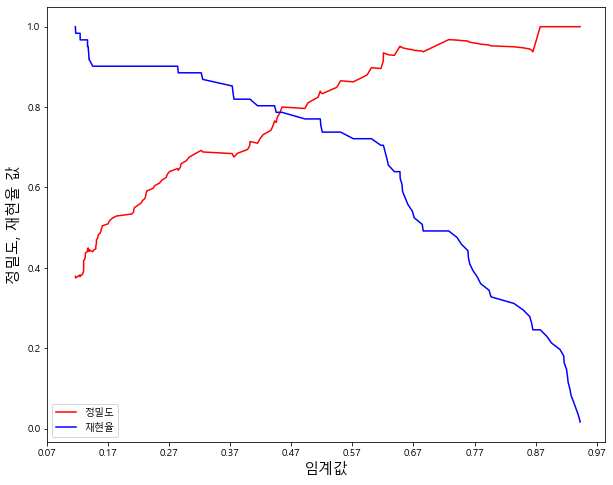

In [74]:
# 시각화
def precision_recall_curve_plot(y_test, pred_proba_1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_1)
    
    # x축을 임계값, y축은 정밀도, 재현율 값.
    plt.figure(figsize = (10, 8))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '-', label='정밀도', color='red')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = '재현율', color = 'blue')
    
    # x축 0.1단위
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 라벨, 범례 설정
    plt.xlabel('임계값', size=15)
    plt.ylabel('정밀도, 재현율 값', size = 15)
    plt.legend()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, -1])

- 정밀도가 100%가 되는 법 : 확실한 경우에만 P로 예측 (TP는 무조건 1, FP는 0 => TP/(TP+FP) = 1)
- 재현율이 100%가 되는 법 : 모두 P로 예측 (FN은 무조건 0 => TP/(FN+TP) = 1)

#### 과제_0914_3
ROC Curve와 AUC를 시각화하여 의미를 설명하고 ROC AUC 값을 구하기

**ROC 곡선** (receiver operation characteristic curve)

→ FPR(False Positive Rate) 가 변할 때 TPR(True Positive Rate)가 어떻게 변화하는지 나타낸 곡선

(x축: FPR, y축: TPR _ 서로 반비례 관계)

TPR = 재현율(민감도) ↔ TNR = 특이성

TPR = TP / (FN+TP)

TNR = TN / (FP+TN)

FPR = FP / (FP+TN) = 1 - TNR  *(FPR+TNR = 1)*
임계값이 0일 수록 FPR이 1에 가까워짐, 임계값이 1일 수록 FPR이 0에 가까워짐
- sklearn의 roc_curve 사용(입력값: 실제 클래스 값, predict_proba의 반환값에서 P칼럼의 예측 확률_주사용됨/ 반환: FPR, TPR, 임계값 배열)

In [85]:
from sklearn.metrics import roc_curve

pred_proba_1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_1)
print(thresholds.shape)
thresholds[:3]

(48,)


array([1.94326279, 0.94326279, 0.94040086])

In [95]:
# 임계값 중 5 step으로 샘플 추출, 0번째 값은 max(예측확률)+1 로 임의 설정되어 제외하고 추출

thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index], 2))

# 5 단위로 추출한 임계값에 따른 FPR, TPR값
print('샘플 임곗값 별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임곗값 별 TPR:', np.round(tprs[thr_index], 3))

fpli = []
tpli = []
for i in range(len(thr_index)-1):
    fp = fprs[thr_index][i+1]-fprs[thr_index][i]
    tp = tprs[thr_index][i+1]-tprs[thr_index][i]
    fpli.append(fp)
    tpli.append(tp)
print('FPR 변화', np.round(fpli, 3))
print('TPR 변화', np.round(tpli, 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값 별 FPR: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값 별 TPR: [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]
FPR 변화 [0.008 0.017 0.051 0.051 0.127 0.322 0.034 0.136 0.102]
TPR 변화 [0.475 0.213 0.033 0.066 0.082 0.016 0.049 0.016 0.033]


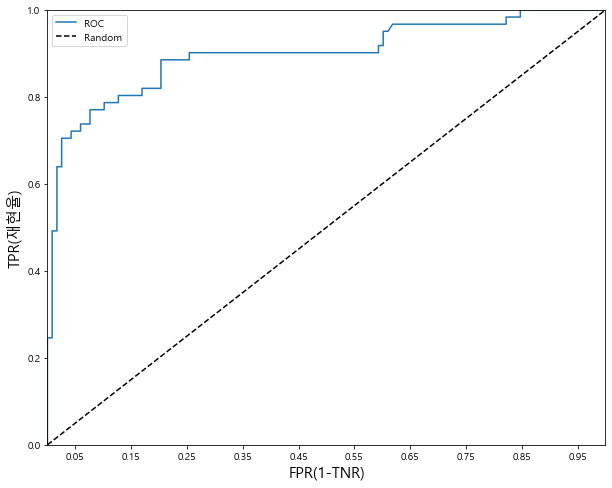

In [103]:
# ROC곡선으로 시각화

def roc_curve_plot(y_test, pred_proba_1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_1)
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111)
    # ROC 곡선
    ax.plot(fprs, tprs, label = 'ROC')
    # 가운데 직선
    ax.plot([0,1], [0,1], 'k--', label = 'Random')
    
    # FPR X축을 0.1단위로 변경
    start, end = ax.set_xlim()
    ax.set_xticks(np.round(np.arange(start, end, 0.1), 2))
    ax.set_xlim(0, 1)
    ax.set_ylim(0,1)
    ax.set_xlabel('FPR(1-TNR)', size = 15)
    ax.set_ylabel('TPR(재현율)', size = 15)
    ax.legend()
roc_curve_plot(y_test, pred_proba_1)

=> AUC값 : ROC곡선 밑의 면적 (1에 가까울수록 좋은 수치)

In [104]:
# AUC 값
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print(f'ROC AUC값 : {roc_score}')

ROC AUC값 : 0.8986524034454015


## 피마 인디언 당뇨병 예측
* 데이터 세트는 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터임.
* 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자 발생

[0914_도전과제] diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.
- SkinThickness 와 Insulin의 0 값은 상당히 많기 때문에 일괄 삭제가 어려우며 평균값으로 대체
- 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
- 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
- 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
- 산출된 임계값을 적용한 평가

※ 피처 정보  
'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압), 
'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린),
'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'


In [72]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, Binarizer
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score, roc_auc_score, precision_recall_curve, roc_curve

In [64]:
dia_df = pd.read_csv('diabetes.csv')
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- 값 확인

In [65]:
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
dia_df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [68]:
dia_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


-> min이 0인곳이 많음

In [69]:
def get_clf_eval(y_test , pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    
    # ROC-AUC
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 :{3: .4f}, AUC :{4: .4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print('재현율 - 정밀도 = ', recall - precision)

# outcome빼고 추출
X = dia_df.iloc[:, :-1]
y = dia_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y) # stratify=y 계층화(train_test_split 함수가 나눠놓은 클래스 레이블 비율을 입력 데이터 셋과 동일하게 맞추는 과정)
_ 
# 로지스틱 회귀로 학습, 예측, 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, F1 : 0.6392, AUC : 0.7919
재현율 - 정밀도 =  -0.1468561584840654


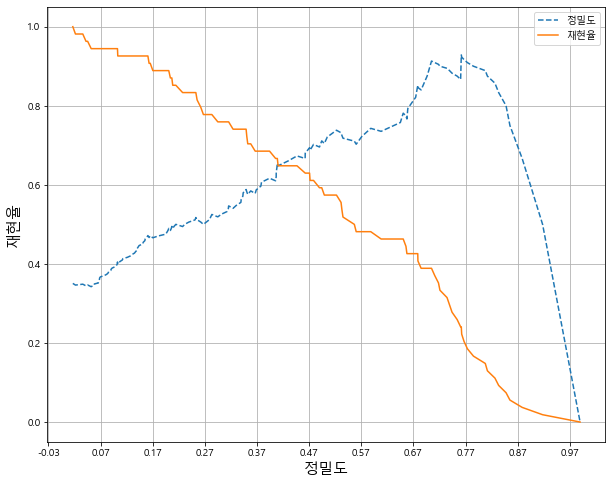

In [70]:
# 임계값에 따른 정밀도 재현율 곡선 변화
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(10,8))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='정밀도')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='재현율')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('정밀도', size = 15)
    plt.ylabel('재현율', size = 15)
    plt.legend()
    plt.grid()
    plt.show()
    
pred_proba_1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_1)

=> 두 곡선이 마주치는 지점의 임계값이 가장 적절 but 정밀도, 재현율 둘 다 0.7 미만의 수치(데이터 조작 필요_min값이 0인 컬럼 조작)

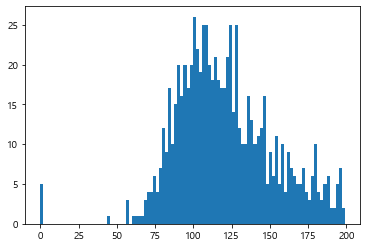

In [74]:
# 0값 확인 (한 컬럼만)
plt.hist(dia_df['Glucose'], bins = 100)
plt.show()

=> 0값에 어느정도 존재

In [77]:
# 0값 검사
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = dia_df['Glucose'].count()

for feature in zero_features:
    zero_count = dia_df[dia_df[feature]==0][feature].count()
    print(f'{feature}컬럼의 0건수= {zero_count}개, 퍼센트= {100*zero_count/total_count : .2f}%')

Glucose컬럼의 0건수= 5개, 퍼센트=  0.65%
BloodPressure컬럼의 0건수= 35개, 퍼센트=  4.56%
SkinThickness컬럼의 0건수= 227개, 퍼센트=  29.56%
Insulin컬럼의 0건수= 374개, 퍼센트=  48.70%
BMI컬럼의 0건수= 11개, 퍼센트=  1.43%


- 1. 0 값은 상당히 많기 때문에 일괄 삭제가 어려우며 평균값으로 대체

In [17]:
# 1. 0 값은 상당히 많기 때문에 일괄 삭제가 어려우며 평균값으로 대체
mean_zero_features = dia_df[zero_features].mean()
dia_df[zero_features] = dia_df[zero_features].replace(0, mean_zero_features)

- 2. 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성

In [21]:
# outcome 칼럼 제외 추출
X = dia_df.iloc[:, :-1]
# outcome 칼럼 추출
y = dia_df.iloc[:, -1]

# 스케일링 적용 (standard 클래스 이용)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# 예측
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

def get_clf_eval(y_test , pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    
    # ROC-AUC
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 :{3: .4f}, AUC :{4: .4f}'.format(accuracy , precision ,recall, f1, roc_auc))

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1 : 0.6804, AUC : 0.8433


=> 재현율 수치 개선 필요

- 3. 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화

In [88]:
def get_clf_eval(y_test , pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    
    # ROC-AUC
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 :{3: .4f}, AUC :{4: .4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print('재현율 - 정밀도 = ', recall - precision)
    
def get_eval_by_thredshold(y_test, pred_proba_1, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(pred_proba_1)
        custom_predict = binarizer.transform(pred_proba_1)
        print(f'임계값: {threshold}')
        get_clf_eval(y_test, custom_predict, pred_proba_1)
        print('-------------')
        
# 임계값 변화        
thresholds = [0.3, 0.33, 0.36, 0.39, 0.41, 0.42, 0.48, 0.50] # 0.41추가
pred_proba = lr_clf.predict_proba(X_test)

get_eval_by_thredshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값: 0.3
오차 행렬
[[63 37]
 [13 41]]
정확도: 0.6753, 정밀도: 0.5256, 재현율: 0.7593, F1 : 0.6212, AUC : 0.7919
재현율 - 정밀도 =  0.23361823361823364
-------------
임계값: 0.33
오차 행렬
[[67 33]
 [14 40]]
정확도: 0.6948, 정밀도: 0.5479, 재현율: 0.7407, F1 : 0.6299, AUC : 0.7919
재현율 - 정밀도 =  0.19279553526128868
-------------
임계값: 0.36
오차 행렬
[[73 27]
 [17 37]]
정확도: 0.7143, 정밀도: 0.5781, 재현율: 0.6852, F1 : 0.6271, AUC : 0.7919
재현율 - 정밀도 =  0.10706018518518523
-------------
임계값: 0.39
오차 행렬
[[77 23]
 [17 37]]
정확도: 0.7403, 정밀도: 0.6167, 재현율: 0.6852, F1 : 0.6491, AUC : 0.7919
재현율 - 정밀도 =  0.06851851851851853
-------------
임계값: 0.41
오차 행렬
[[81 19]
 [19 35]]
정확도: 0.7532, 정밀도: 0.6481, 재현율: 0.6481, F1 : 0.6481, AUC : 0.7919
재현율 - 정밀도 =  0.0
-------------
임계값: 0.42
오차 행렬
[[82 18]
 [19 35]]
정확도: 0.7597, 정밀도: 0.6604, 재현율: 0.6481, F1 : 0.6542, AUC : 0.7919
재현율 - 정밀도 =  -0.012229210342417862
-------------
임계값: 0.48
오차 행렬
[[86 14]
 [22 32]]
정확도: 0.7662, 정밀도: 0.6957, 재현율: 0.5926, F1 : 0.6400, AUC : 0.7919
재현율 - 정밀도 =  -0.1030595813204509


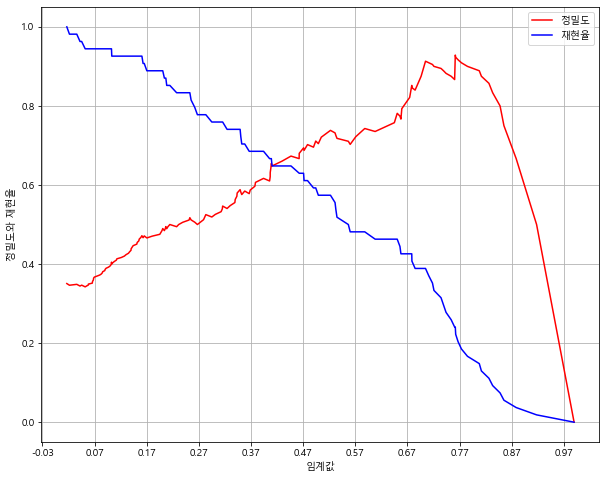

In [83]:
# 임계값에 따른 정확도, 정밀도 시각화
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 정밀도, 재현율 추출
    precision, recall, thresholds = precision_recall_curve(y_test, pred_proba_c1) 
    
    # X축 : 임계값, y축 정밀도, 재현율 값
    plt.figure(figsize = (10, 8))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precision[0:threshold_boundary], linestyle = '-', label = '정밀도', color = 'red')
    plt.plot(thresholds, recall[0: threshold_boundary], label = '재현율', color = 'blue')
    
    # 임계값 (X)축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x, y축 라벨과 범례, 눈금 설정
    plt.xlabel('임계값')
    plt.ylabel('정밀도와 재현율')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, pred_proba[:, 1]) 

=> 임계값이 0.42일 때 F1이 가장 크고, 정밀도와 재현율의 차이가 가장 적음

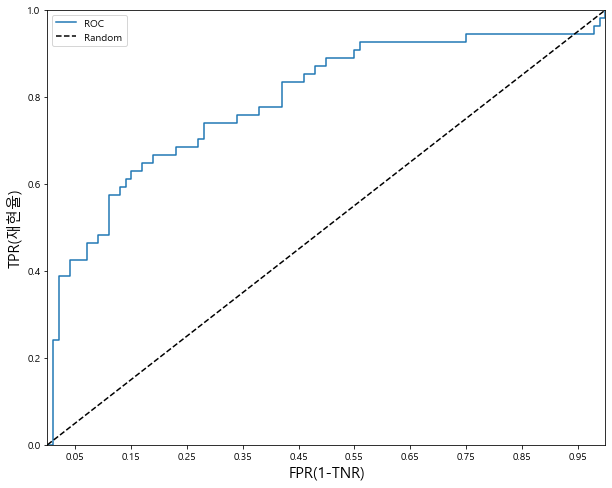

In [90]:
# ROC곡선으로 시각화

def roc_curve_plot(y_test, pred_proba_1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_1)
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111)
    # ROC 곡선
    ax.plot(fprs, tprs, label = 'ROC')
    # 가운데 직선
    ax.plot([0,1], [0,1], 'k--', label = 'Random')
    
    # FPR X축을 0.1단위로 변경
    start, end = ax.set_xlim()
    ax.set_xticks(np.round(np.arange(start, end, 0.1), 2))
    ax.set_xlim(0, 1)
    ax.set_ylim(0,1)
    ax.set_xlabel('FPR(1-TNR)', size = 15)
    ax.set_ylabel('TPR(재현율)', size = 15)
    ax.legend()
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
roc_curve_plot(y_test, pred_proba_1)

In [91]:
# 임계값이 0.42일 때 값 확인
binarizer = Binarizer(threshold = 0.42)
pred_th = binarizer.fit_transform(pred_proba_1)
get_clf_eval(y_test, pred_th, pred_proba[:, 1])

오차 행렬
[[82 18]
 [19 35]]
정확도: 0.7597, 정밀도: 0.6604, 재현율: 0.6481, F1 : 0.6542, AUC : 0.7919
재현율 - 정밀도 =  -0.012229210342417862


# 교차검증

#### 과제_0916_1
p.100 ~ 115 예제 풀기

- k 폴드 교차 검증

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold # k폴드 구현
import numpy as np

# 붓꽃 데이터 불러오기
iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리
kfold = KFold(n_splits=5)
# 포드 세트별 정확도 담는 리스트
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [7]:
# k 폴드로 나눈 데이터를 학습용/검증용 테스트의 인덱스 반환
n_iter = 0

for train_index, test_index in kfold.split(features): # split을 사용하여 전체 데이터를 k개의 폴드 데이터 세트로 분리(학습용 = (k-1)/k, 테스트용 = 1/k)
    # 반환된 인덱스로 학습용, 테스트용 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습, 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter +=1

    # 반복 할 때마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('-------------------------------------------------')
    print(f'#{n_iter} 교차 검증 정확도: {accuracy}, 학습 데이터 크기: {train_size}, 검증 데이터 크기: {test_size}')
    print(f'#{n_iter} 검증 세트 인덱스: {test_index}')
    cv_accuracy.append(accuracy)

# 개별 정확도를 합하여 평균 정확도 계산
print('===================전체 확인====================')
print('전체 검증 정확도:', cv_accuracy)
print(f'평균 검증 정확도: {np.mean(cv_accuracy)}')

-------------------------------------------------
#1 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
-------------------------------------------------
#2 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
-------------------------------------------------
#3 교차 검증 정확도: 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
-------------------------------------------------
#4 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
-------------------------------------------------
#5 교차 검증 정확도: 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스: [120 121 122 123 124 

=> 인덱스가 순서대로 쪼개지는걸 알 수 있음 (불균형한 분포를 가진 데이터에는 적합하지 않음)_이를 보완한게 Stratified K폴드

- Stratified K 폴드
  - 원본 데이터의 레이블 분포를 고려 후 해당 분포와 동일하게 학습과 검정 데이터 세트를 분배하는 검증


In [8]:
# K폴드 교차 검정의 부적합 예시

In [9]:
# 먼저 원본데이터의 분포 확인

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [10]:
# 위의 데이터를 토대로 3개의 폴드 세트 생성 후 분포도 확인

kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(f'교차 검증: {n_iter}')
    print('학습 레이블 분포:', '\n', label_train.value_counts())
    print('검증 레이블 분포:', '\n', label_test.value_counts())

교차 검증: 1
학습 레이블 분포: 
 1    50
2    50
Name: label, dtype: int64
검증 레이블 분포: 
 0    50
Name: label, dtype: int64
교차 검증: 2
학습 레이블 분포: 
 0    50
2    50
Name: label, dtype: int64
검증 레이블 분포: 
 1    50
Name: label, dtype: int64
교차 검증: 3
학습 레이블 분포: 
 0    50
1    50
Name: label, dtype: int64
검증 레이블 분포: 
 2    50
Name: label, dtype: int64


=> 학습 레이블과 검증 레이블이 완전 다른 값으로 추출(kfold방법 적합하지 않음)

In [11]:
# SF 사용
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']): # 피처 데이터 세트와 레이블 데이터 세트 입력
    n_iter +=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(f'교차 검증: {n_iter}')
    print('학습 레이블 분포:', '\n', label_train.value_counts())
    print('검증 레이블 분포:', '\n', label_test.value_counts())

교차 검증: 1
학습 레이블 분포: 
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 분포: 
 0    17
1    17
2    16
Name: label, dtype: int64
교차 검증: 2
학습 레이블 분포: 
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 분포: 
 0    17
2    17
1    16
Name: label, dtype: int64
교차 검증: 3
학습 레이블 분포: 
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 분포: 
 1    17
2    17
0    16
Name: label, dtype: int64


=> 레이블 별로 거의 동일하게 분포됨

In [12]:
# 검증 정확도 확인

dt_clf = DecisionTreeClassifier(random_state = 156)

skfold = StratifiedKFold(n_splits = 3)
n_iter = 0
cv_accuracy = [] #검증 정확도

for train_index, test_index in  skfold.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습, 예측
    dt_clf.fit(X_train, y_train)
    y_preds = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter+=1
    accuracy = np.round(accuracy_score(y_test, y_preds), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('================================')
    print(f'{n_iter} 교차 검증 정확도: {accuracy}, 학습 데이터 크기: {train_size}, 검증 데이터 크기: {test_size }')
    print(f'{n_iter} 검증 세트 인덱스: {test_index}')
    cv_accuracy.append(accuracy)
    
print('<최종확인>')
print(f'교차 검증별 정확도', cv_accuracy)
print(f'평균 검증 정확도: {np.mean(cv_accuracy)}')

1 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
2 교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]
3 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
<최종확인>
교차 검증별 정확도 [0.98, 0.94, 0.98]
평균 검증 정확도: 0.9666666666666667


=> 정확도가 약 96.67%

In [13]:
# 교차 검증 보다 간단히 사용(cross_val_score활용)

from sklearn.model_selection import cross_val_score, cross_validate
iris_data = load_iris()
data = iris_data.data
label = iris_data.target
dt_clf = DecisionTreeClassifier(random_state = 156)

# 성능 지표의 정확도
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도', scores)
print('평균 점증 정확도', np.mean(scores))

교차 검증별 정확도 [0.98 0.94 0.98]
평균 점증 정확도 0.9666666666666667


- GridSearchCV(최적의 하이퍼 파라미터 값 튜닝)

In [14]:
# 파라미터 집합 생성
grid_parameters = {'max_depth': [1, 2, 3],
                  'min_samples_split' : [2, 3]}

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터 로딩 후 학습 데이터 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=21)

dtree = DecisionTreeClassifier()

#파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth': [1, 2, 3], 'min_samples_split':[2, 3]}

In [16]:
# GridSearchCV 객체의 학습 데이터 세트 메서드에 인자로 입력
# param_grid에 파라미터를 입력하면 순차적으로 학습 및 평가 수행
# cv에 나눌 숫자 n을 입력-> pram_grid 하이퍼 파라미터를 n개의 훈련(train)용, test set fold로 나눠 테스트 수행

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit = True) # refit =True (default값) : 가장 좋은 파라미터 설정으로 재학습

# 붓꽃 데이터 적용
grid_dtree.fit(X_train, y_train)

# 결과 추출
score_df = pd.DataFrame(grid_dtree.cv_results_)
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000386,0.000546,0.000431,0.000609,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.675,0.675,0.683333,0.011785,5
1,0.002975,0.004208,0.000000,0.000000,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.675,0.675,0.683333,0.011785,5
2,0.002928,0.002059,0.000667,0.000471,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.950,0.975,1.000,0.975000,0.020412,3
3,0.001053,0.000077,0.001351,0.000428,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.950,0.975,1.000,0.975000,0.020412,3
4,0.000000,0.000000,0.000000,0.000000,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.000,1.000,0.991667,0.011785,1
5,0.000000,0.000000,0.000000,0.000000,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.000,1.000,0.991667,0.011785,1


In [17]:
print('최적파라미터:', grid_dtree.best_params_)
print('최고 정확도:', grid_dtree.best_score_)

최적파라미터: {'max_depth': 3, 'min_samples_split': 2}
최고 정확도: 0.9916666666666667


In [18]:
# refit=True로 설정하여 최적의 하이퍼 파라미터로 estimator을 학습해 best_estimator_ 인자에 저장됨
# best_estimator로 예측 후 성능 평가

estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: ', accuracy_score(y_test, pred))

테스트 데이터 세트 정확도:  0.9333333333333333


#### 과제_0916_2
- tdf1 데이터 셋 RandomForest 알고리즘을 사용하여 모델링하고 사용자 함수를 작성하여 평가하기(분류 평가 방법 전부 적용)
- 상기 모델에 대하여 교차검증(cv=5)을 수행하고 평균 정확도를 출력하기
- 상기 모델에 대하여 교차검증 및 성능 개선을 수행한 후 사용자 함수를 사용하여 평가 결과를 도출하기. (GridSearchCV 활용)

  - 하이퍼파라미터 : 
        params = {'n_estimators':[50,100,200],
                         'max_depth':[2, 4, 6, 8, 10],
                         'min_samples_leaf':[2,8,14,20],
                         'min_samples_split':[2,8.14,20]}

##### 1. 파일 불러오기, 값 확인

In [22]:
import pandas as pd
import numpy as np
df = pd.read_pickle('tdf1.pkl')
df.head()

,Survived,Sex,Town_0,Town_1,Town_2,Family_Big,Family_Single,Family_Small,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_Elderly,Fare_cat
0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,4
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,4
4,0,1,0,0,1,0,1,0,0,0,0,1,0,0,2


In [11]:
print(df['Survived'].value_counts(), '\n')
print(df['Sex'].value_counts(), '\n')
print(df['Fare_cat'].value_counts(), '\n')

0    549
1    342
Name: Survived, dtype: int64 

1    577
0    314
Name: Sex, dtype: int64 

3    232
1    226
4    222
2    196
0     15
Name: Fare_cat, dtype: int64 



=> sex - 1: 남성, 2: 여성/ fare_cat - 0~4(5개)

##### 2. RandomForest 모델 학습 및 평가

In [16]:
# Randomforest 모델 학습 / 평가

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, precision_recall_curve, roc_curve

X = df.drop(['Survived'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11)

rl_clf = RandomForestClassifier(random_state=11)

# 학습/예측/평가
rl_clf.fit(X_train, y_train)
df_pred = rl_clf.predict(X_test)

In [20]:
# 평가값 구하는 함수 생성
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 :{3: .4f}'.format(accuracy , precision ,recall, f1))
    
get_clf_eval(y_test, df_pred)

오차 행렬
[[99 19]
 [13 48]]
정확도: 0.8212, 정밀도: 0.7164, 재현율: 0.7869, F1 : 0.7500


##### 3. 교차검증 수행 후 평균 정확도 출력

In [23]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(rl_clf, X, y, cv=5)
print('교차 검증별 정확도', scores)
print('평균 검증 정확도: ', np.mean(scores))

교차 검증별 정확도 [0.7877095  0.78651685 0.76404494 0.78089888 0.83707865]
평균 검증 정확도:  0.7912497646098802


##### 4. GridSearchCV 활용하여 성능 생선 수행 후 평가 결과 도출

In [28]:
# 주어진 하이퍼파라미터 사용
params = {'n_estimators':[50,100,200],
         'max_depth':[2, 4, 6, 8, 10],
         'min_samples_leaf':[2,8,14,20],
         'min_samples_split':[2,8.14,20]}

In [31]:
from sklearn.model_selection import GridSearchCV

grid_dtree = GridSearchCV(rl_clf, param_grid=params, cv=5, refit=True)

# 데이터 적용
grid_dtree.fit(X_train, y_train)

# 결과 추출
score_df = pd.DataFrame(grid_dtree.cv_results_)
score_df

C:\Users\jeoun\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jeoun\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jeoun\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterato

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.138300,0.030176,0.010025,0.008207,2,2,2,50,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",1.000000,0.916667,1.0,1.000000,0.958333,0.975000,0.033333,5
1,0.246077,0.004663,0.022802,0.006583,2,2,2,100,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",1.000000,0.916667,1.0,1.000000,0.958333,0.975000,0.033333,5
2,0.504200,0.038230,0.043029,0.006053,2,2,2,200,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",1.000000,0.916667,1.0,1.000000,0.958333,0.975000,0.033333,5
3,0.034653,0.006137,0.000000,0.000000,2,2,8.14,50,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,143
4,0.070824,0.008444,0.000000,0.000000,2,2,8.14,100,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.062822,0.000649,0.000000,0.000000,10,20,8.14,100,"{'max_depth': 10, 'min_samples_leaf': 20, 'min...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,140
176,0.137879,0.009167,0.000000,0.000000,10,20,8.14,200,"{'max_depth': 10, 'min_samples_leaf': 20, 'min...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,141
177,0.118387,0.005471,0.013088,0.006570,10,20,20,50,"{'max_depth': 10, 'min_samples_leaf': 20, 'min...",0.916667,0.958333,1.0,0.958333,0.958333,0.958333,0.026352,97
178,0.240602,0.005220,0.020354,0.005741,10,20,20,100,"{'max_depth': 10, 'min_samples_leaf': 20, 'min...",0.916667,0.958333,1.0,0.958333,0.958333,0.958333,0.026352,97


In [33]:
print('최적파라미터:', grid_dtree.best_params_)
print('최고 정확도:', grid_dtree.best_score_)

최적파라미터: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
최고 정확도: 0.9833333333333332


In [46]:
# 평가값 구하는 함수 생성
def get_clf_eval(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    
    print(f'정확도: {accuracy}')
    
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
get_clf_eval(y_test, pred)

정확도: 0.9333333333333333
